# This notebook is work for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

Exploring the data, finding outliers, finding null values 

In [147]:
# importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from statsmodels.stats import weightstats as stests

In [3]:
# reading and previewing the csv file
df = pd.read_csv('/home/francis/Downloads/autolib_daily_events_postal_code.csv')
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [4]:
print('The dataset has ', df.shape[0], 'rows and', df.shape[1],' columns')

The dataset has  16085 rows and 13  columns


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [6]:
#checking for null values

df.isnull().sum()
# there are no null values in the dataset

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

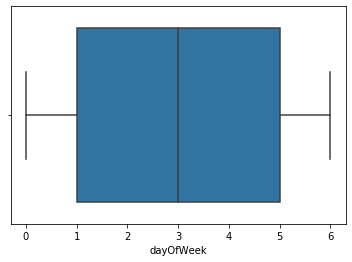

In [7]:
#checking for outliers
sns.boxplot(x=df['dayOfWeek'])


## Univariate analysis

(array([2374., 2363.,    0., 2268.,    0., 2268., 2271.,    0., 2267.,
        2274.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

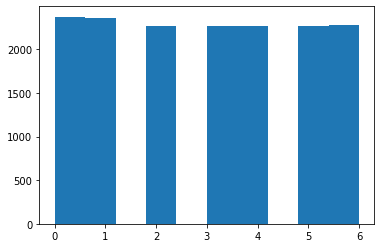

In [8]:
plt.hist(df['dayOfWeek'])
# the service is used through out the week

(array([3431.,  468.,    0.,    0.,    0.,    0.,    0.,  467., 8445.,
        3274.]),
 array([75001. , 77088.9, 79176.8, 81264.7, 83352.6, 85440.5, 87528.4,
        89616.3, 91704.2, 93792.1, 95880. ]),
 <a list of 10 Patch objects>)

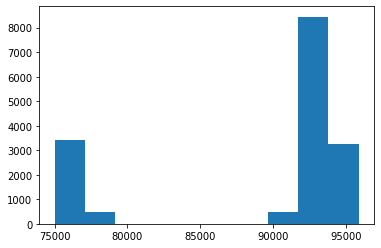

In [9]:
plt.hist(df['Postal code'])
# the largest traffic is found between the 9000 and 9500 postal codes

AxesSubplot(0.125,0.125;0.775x0.755)


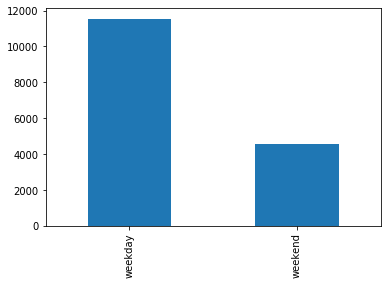

In [10]:
#print(plt.pie(df['day_type'].value_counts(), labels=['Weekdays', 'Weekends']))

print(df['day_type'].value_counts().plot.bar())

#most of the traffic is during the weekdays

## Bivariate analysis

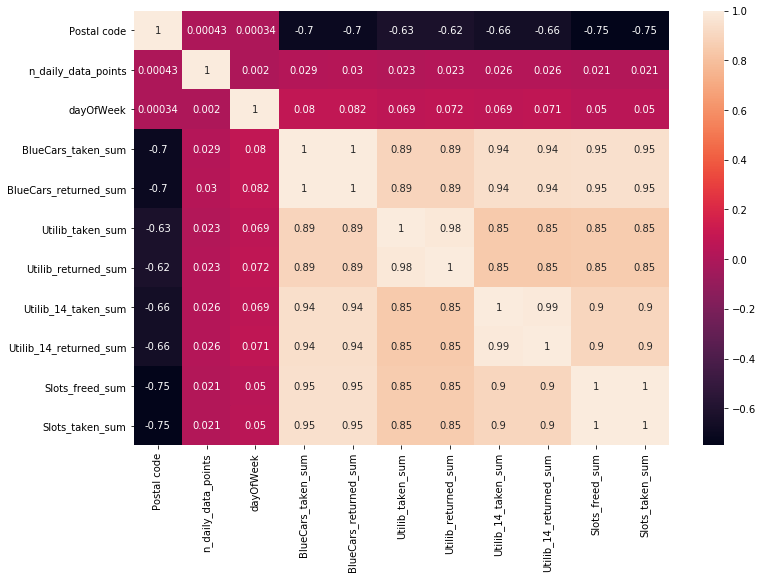

In [13]:
plt.figure(figsize=(12, 8))

h_map =df.corr()
sns.heatmap(h_map,xticklabels = h_map.columns.values,yticklabels = h_map.columns.values,annot = True);

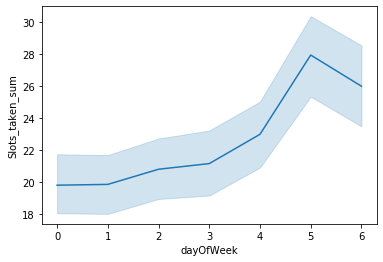

In [19]:
dates= df['dayOfWeek']
taken=df['BlueCars_taken_sum']
sns.lineplot(dates,taken)
plt.show()
#day 5 sees the most number of blue cars take


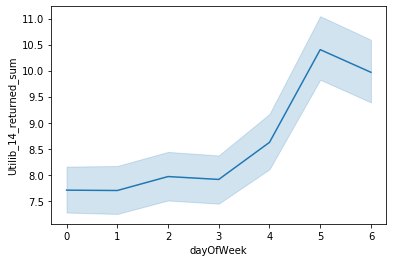

In [55]:

dat= df['dayOfWeek']
slots=df['Utilib_14_returned_sum']
sns.lineplot(dat,slots)
plt.show()



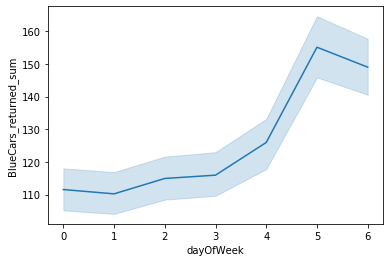

In [26]:
dates= df['dayOfWeek']
rerurn=df['BlueCars_returned_sum']
sns.lineplot(dates,rerurn)
plt.show()

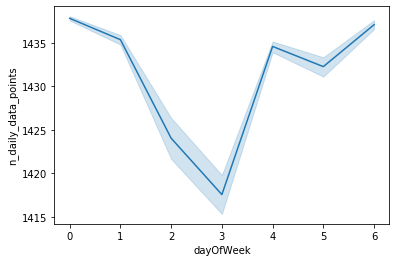

In [27]:
dates= df['dayOfWeek']
points=df['n_daily_data_points']
sns.lineplot(dates,points)
plt.show()
# number of daily data poinst that were available for aggregation, per day reduce on thursday which is day 3


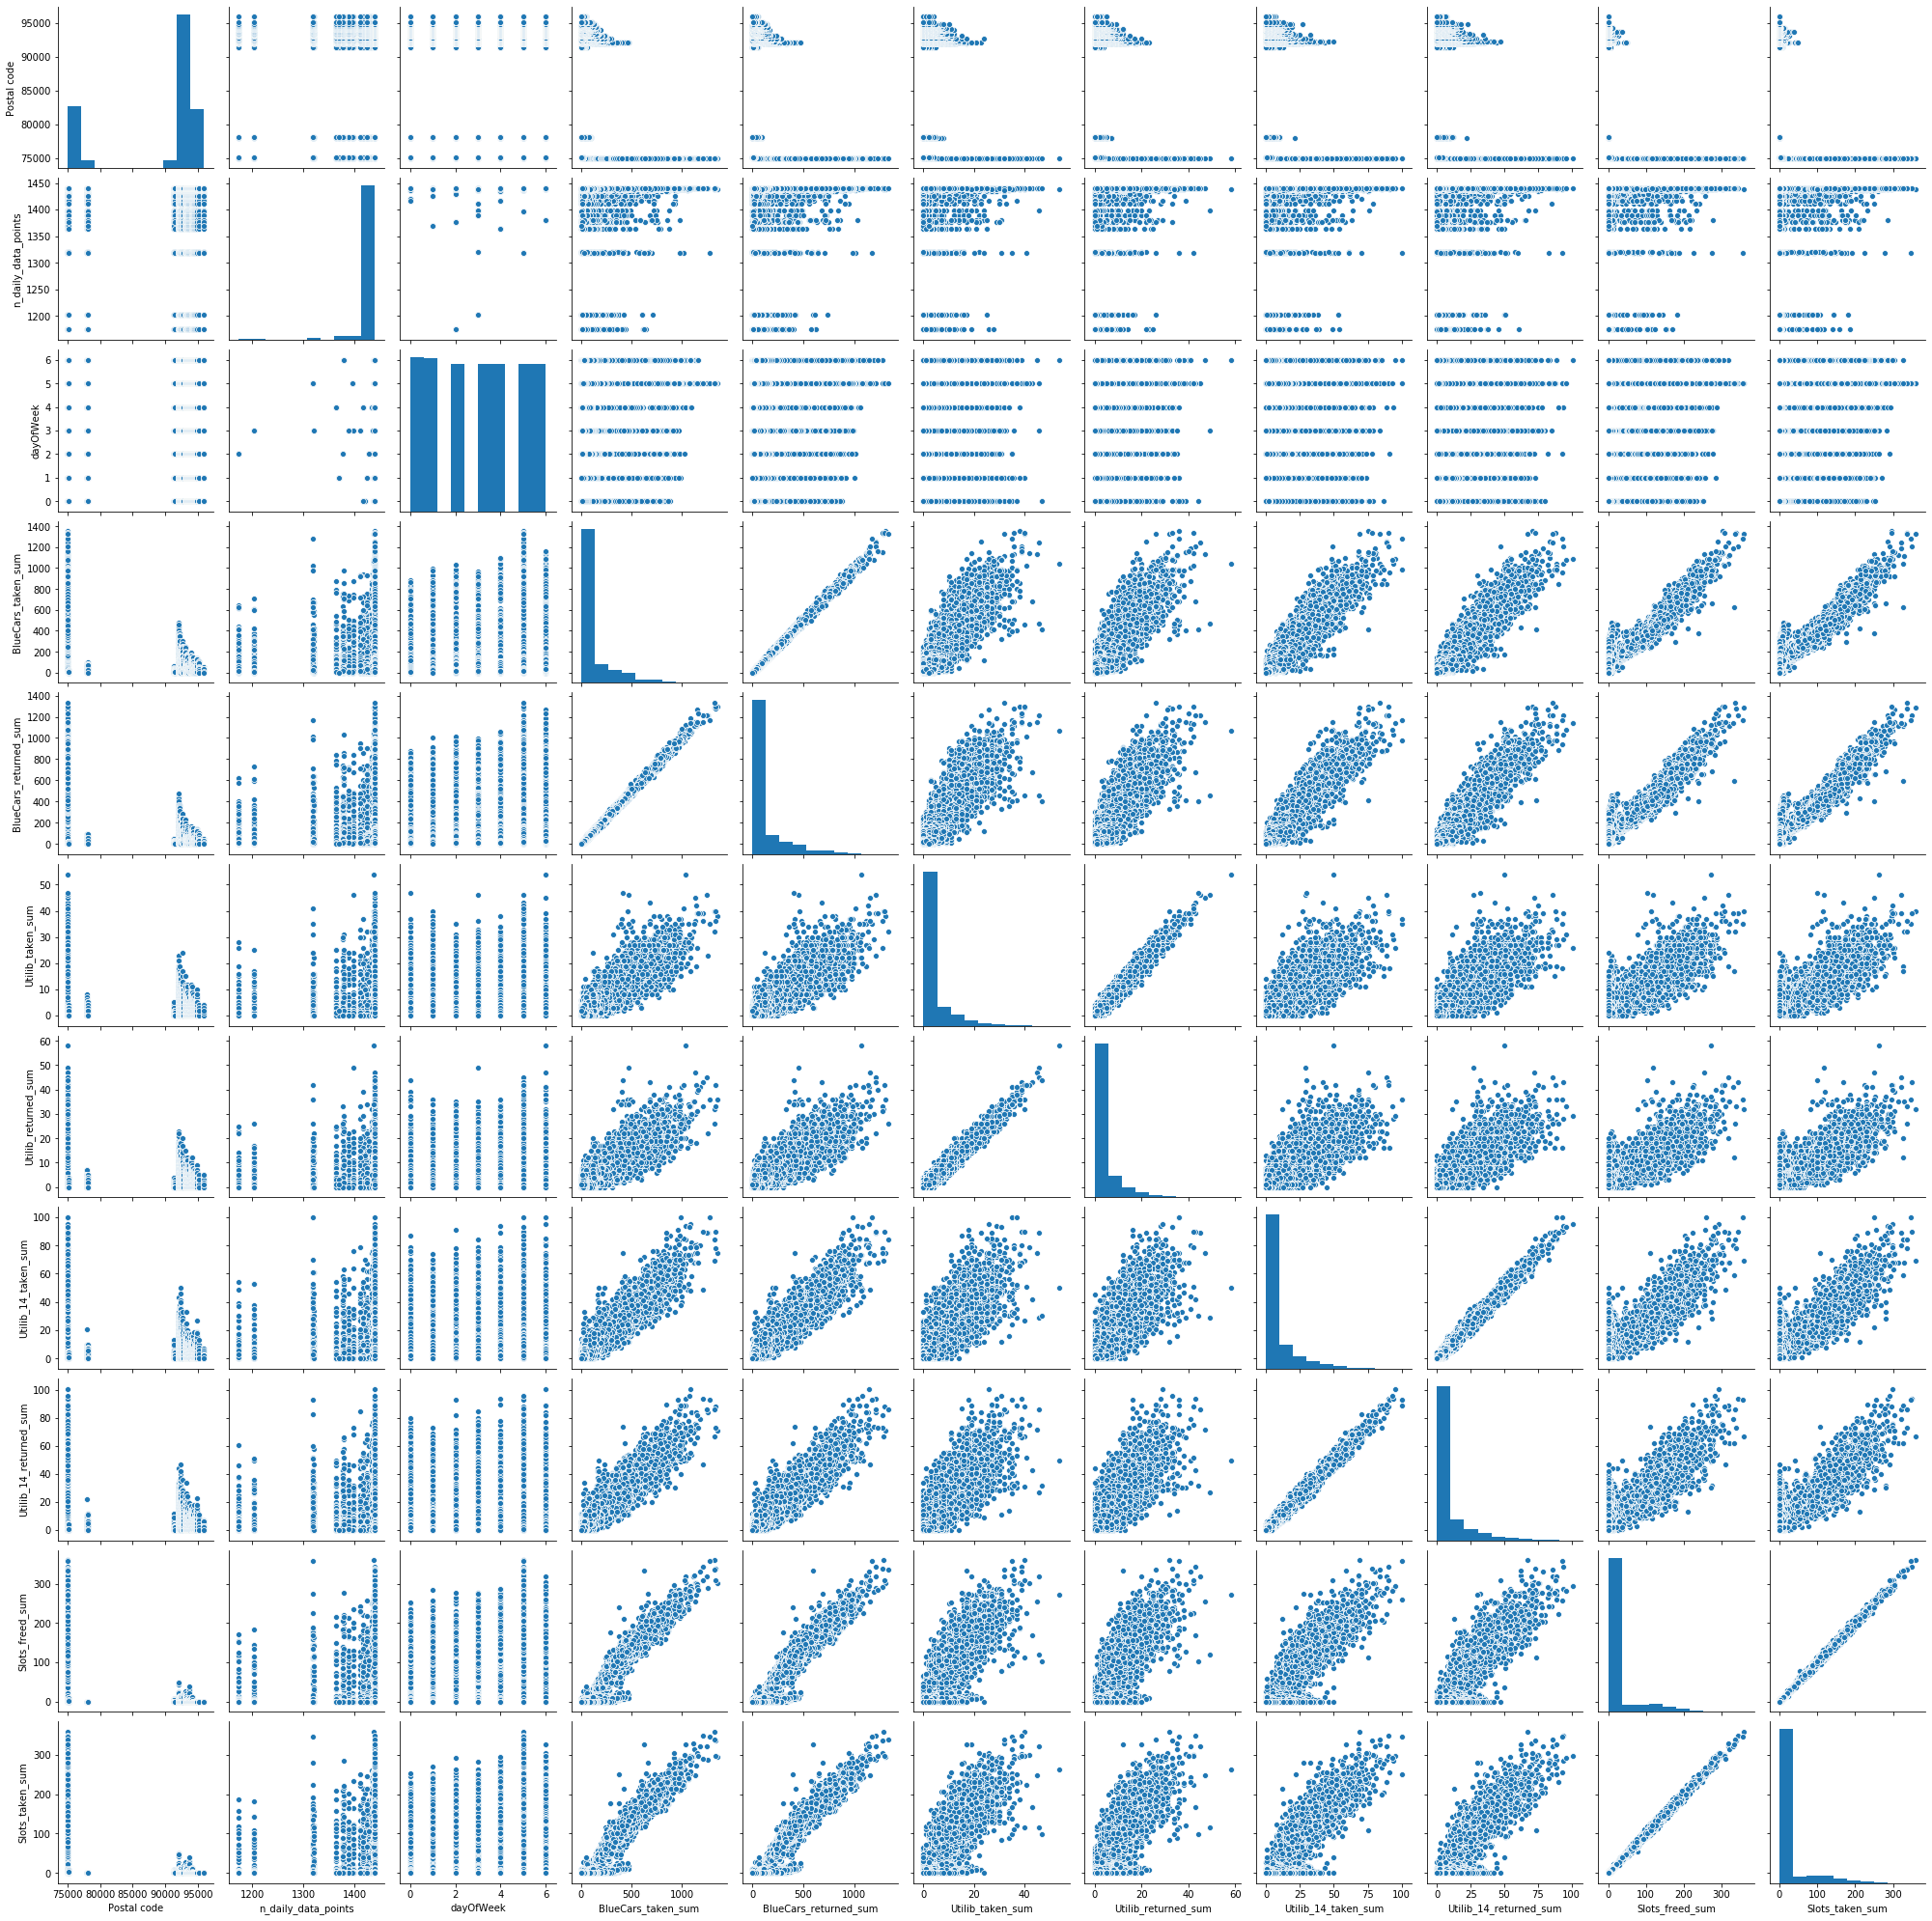

In [82]:
sns.pairplot(df)

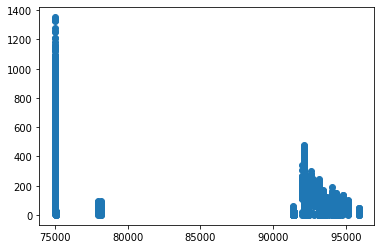

In [39]:
places=df['Postal code']
sum_taken=df['BlueCars_taken_sum']
plt.scatter(places,sum_taken)
plt.show()

# Hypothesis testing

Is the number of Bluecars taken in area X different than in area Y?

In [48]:
dataset=pd.crosstab(df['n_daily_data_points'],df['day_type'])
print(dataset)

day_type             weekday  weekend
n_daily_data_points                  
1174                     104        0
1203                     103        0
1318                       0      103
1320                     103        0
1364                     103        0
1370                      94        0
1377                     102        0
1380                       0      103
1389                     103        0
1396                       0       98
1398                     104        0
1411                     104        0
1417                     206        0
1420                     103        0
1425                     207        0
1429                     104        0
1434                     207        0
1435                     104        0
1436                     104        0
1437                     308      103
1438                     516      207
1439                    2269      310
1440                    6496     3617


In [80]:
df[['BlueCars_taken_sum','n_daily_data_points']].describe()

,BlueCars_taken_sum,n_daily_data_points
count,16085.000000,16085.000000
mean,125.926951,1431.330619
std,185.426579,33.212050
min,0.000000,1174.000000
25%,20.000000,1439.000000
50%,46.000000,1440.000000
75%,135.000000,1440.000000
max,1352.000000,1440.000000


In [75]:
df.groupby('day_type').count()

,Postal code,date,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
day_type,,,,,,,,,,,,
weekday,11544,11544,11544,11544,11544,11544,11544,11544,11544,11544,11544,11544
weekend,4541,4541,4541,4541,4541,4541,4541,4541,4541,4541,4541,4541


In [130]:
df.count()
# There are about 16,000 rows per column therefore I will pick a representative sample of 10%
# which is 1600 

Postal_code               16085
date                      16085
n_daily_data_points       16085
dayOfWeek                 16085
day_type                  16085
BlueCars_taken_sum        16085
BlueCars_returned_sum     16085
Utilib_taken_sum          16085
Utilib_returned_sum       16085
Utilib_14_taken_sum       16085
Utilib_14_returned_sum    16085
Slots_freed_sum           16085
Slots_taken_sum           16085
dtype: int64

# There are about 16,000 rows per column therefore I will pick a representative sample of 10% which is 1600 

## Null hypothesis 
The number of slots taken during the weekend in postal code 75015 are different from ones taken in 75017.

## Alternative hypothesis
The number of slots taken during the weekend in postal code 75015 are not different from the ones taken in 75017

# since we are comparing two groups of the 75015 and 75017, a T-test will be used.

In [94]:
#
sample=df.sample(n=1600,replace='False')
print(sample)

       Postal code       date  n_daily_data_points  dayOfWeek day_type  \
2311         75015  5/22/2018                 1438          1  weekday   
10867        93200  6/19/2018                 1370          1  weekday   
12469        93500  5/21/2018                 1440          0  weekday   
14775        94340   4/7/2018                 1318          5  weekend   
3337         75116   3/6/2018                 1439          1  weekday   
...            ...        ...                  ...        ...      ...   
15742        95100  5/20/2018                 1440          6  weekend   
7371         92300  2/12/2018                 1440          0  weekday   
3266         75112  6/10/2018                 1440          6  weekend   
13579        94120   6/9/2018                 1440          5  weekend   
13752        94140   1/7/2018                 1440          6  weekend   

       BlueCars_taken_sum  BlueCars_returned_sum  Utilib_taken_sum  \
2311                  856                

In [96]:
sample.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,89001.503750,1431.499375,2.938125,115.429375,115.671250,3.44375,3.491875,7.888125,7.875000,20.225625,20.263125
std,7510.280641,32.165827,2.011672,170.228464,170.513009,5.43878,5.572193,11.822826,11.859639,48.914314,49.067198
min,75001.000000,1174.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91400.000000,1439.000000,1.000000,19.000000,19.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92350.000000,1440.000000,3.000000,44.000000,44.000000,1.00000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93370.000000,1440.000000,5.000000,120.250000,121.250000,4.00000,4.000000,9.000000,9.000000,4.000000,4.000000
max,95880.000000,1440.000000,6.000000,1005.000000,1004.000000,38.00000,34.000000,87.000000,87.000000,278.000000,278.000000


In [106]:
sample.columns = df.columns.str.replace(" ", "_")

In [117]:
sample.shape

(1600, 13)

In [119]:
df_null1 = sample[(sample.Postal_code== 75015) & (sample.day_type == 'weekend')]
df_null1

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum


In [114]:
df_null2 = sample[(sample.Postal_code == 75017) & (sample.day_type == 'weekend')]
df_null2

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
2617,75017,5/5/2018,1440,5,weekend,868,876,22,23,63,62,235,232
2515,75017,1/20/2018,1439,5,weekend,945,939,17,23,42,44,253,255
2582,75017,3/31/2018,1440,5,weekend,806,834,21,23,64,65,184,197
2635,75017,6/3/2018,1440,6,weekend,857,897,30,32,59,60,226,229


## Since address code 75015 doesnt have any weekend data, we switch to the weekday testing.

# FInal hypothesis
### Null hypothesis 
The number of slots taken during the weekday in postal code 75015 are the same as ones taken in 75017.

## Alternative hypothesis
The number of slots taken during the weekday in postal code 75015 are not same the ones taken in 75017.

In [121]:
hype_one = sample[(sample.Postal_code== 75015) & (sample.day_type == 'weekday')]
hype_one

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
2311,75015,5/22/2018,1438,1,weekday,856,813,38,34,74,73,239,230
2288,75015,4/18/2018,1377,2,weekday,757,745,29,33,58,56,206,209
2220,75015,2/6/2018,1439,1,weekday,781,793,25,22,40,40,204,200
2186,75015,1/3/2018,1439,2,weekday,739,752,31,30,65,67,194,201
2261,75015,3/22/2018,1440,3,weekday,813,828,21,17,57,61,228,236
2222,75015,2/8/2018,1438,3,weekday,703,693,16,12,47,45,221,214
2303,75015,5/3/2018,1439,3,weekday,773,807,24,23,65,64,237,243
2266,75015,3/27/2018,1440,1,weekday,797,792,23,21,60,60,248,251
2191,75015,1/8/2018,1438,0,weekday,694,728,22,22,50,52,200,209
2283,75015,4/13/2018,1439,4,weekday,1005,963,23,24,66,70,274,275


In [122]:
hype_two = sample[(sample.Postal_code== 75017) & (sample.day_type == 'weekday')]
hype_two

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
2518,75017,1/23/2018,1439,1,weekday,660,612,19,21,39,42,172,168
2563,75017,3/12/2018,1440,0,weekday,664,633,17,20,31,31,186,182
2540,75017,2/14/2018,1440,2,weekday,739,709,21,19,48,56,217,212
2525,75017,1/30/2018,1440,1,weekday,716,697,22,21,53,56,193,190
2498,75017,1/3/2018,1439,2,weekday,638,616,15,13,27,26,153,144
2525,75017,1/30/2018,1440,1,weekday,716,697,22,21,53,56,193,190
2533,75017,2/7/2018,1439,2,weekday,555,553,16,14,46,46,164,163
2514,75017,1/19/2018,1440,4,weekday,745,763,16,14,34,31,189,192


In [125]:
hype_one['Slots_taken_sum'].mean()

227.14285714285714

In [135]:
hype_two['Slots_taken_sum'].mean()

180.125

In [127]:
hype_one['Slots_taken_sum'].describe()

count     14.000000
mean     227.142857
std       21.710888
min      200.000000
25%      209.000000
50%      226.500000
75%      240.500000
max      275.000000
Name: Slots_taken_sum, dtype: float64

In [129]:
hype_two['Slots_taken_sum'].describe()

count      8.000000
mean     180.125000
std       21.047141
min      144.000000
25%      166.750000
50%      186.000000
75%      190.500000
max      212.000000
Name: Slots_taken_sum, dtype: float64

In [145]:
# T-test for the two groups
for_one= hype_one['Slots_taken_sum']
for_two= hype_two['Slots_taken_sum']
stats.ttest_ind(a=for_one,b=for_two)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

accept null hypothesis
